# Embeddings via API

In this notebook, we demonstrate how to obtain embeddings using OpenAI's API.

In [1]:
%load_ext dotenv
%dotenv ../../05_src/.secrets

In [2]:
documents = [
    "The machine learning model predicts customer behavior based on historical data.",
    "The machine learning model predicts user behavior using historical data.",
    "A machine learning model predicts customer behavior from past data.",
    "The predictive model uses historical customer data to forecast behavior.",
    "Customer behavior is predicted by a data-driven machine learning system.",
    "Historical data is analyzed to understand how customers behave.",
    "A data science model analyzes past information to make predictions.",
    "Business analysts study customer trends to support decision making.",
    "Statistical techniques are used to interpret large datasets.",
    "The weather forecast was inaccurate due to missing satellite data.",
    "A novel explores human relationships in a small coastal town."
]

OpenAI's text embeddings are available through the embeddings API. A key reference is the [Embeddings API documentation](https://platform.openai.com/docs/guides/embeddings).

There are three models that we can choose from, depending on [the size of the hidden representation, latency, and cost](https://platform.openai.com/docs/guides/embeddings#embedding-models):

+ `text-embedding-3-small`
+ `text-embedding-3-large`
+ `text-embedding-ada-002`

A simple implementation would call the embeddings API for each phrase.

In [3]:

from openai import OpenAI
import os
client = OpenAI(base_url='https://k7uffyg03f.execute-api.us-east-1.amazonaws.com/prod/openai/v1', 
                api_key='any value',
                default_headers={"x-api-key": os.getenv('API_GATEWAY_KEY')})

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=text, model=model).data[0].embedding

embeddings = [get_embedding(doc) for doc in documents]

In [4]:
embeddings

[[-0.03404679149389267,
  -0.008216269314289093,
  0.003350052749738097,
  -0.014024513773620129,
  0.04570787400007248,
  -0.002909696428105235,
  -0.01785951666533947,
  0.03462650254368782,
  -0.027157166972756386,
  0.01910812221467495,
  -0.00773131987079978,
  -0.024236321449279785,
  -0.02697879448533058,
  -0.0110144829377532,
  -0.0036120370496064425,
  0.005532325245440006,
  0.015652161091566086,
  -0.02651056833565235,
  -0.04144923761487007,
  -0.011627637781202793,
  0.031014466658234596,
  0.045640986412763596,
  0.023857280611991882,
  -0.0475807823240757,
  0.021003326401114464,
  0.01895204558968544,
  -0.04066886007785797,
  0.01921960338950157,
  -0.009464874863624573,
  -0.040334414690732956,
  0.008177250623703003,
  -0.016321055591106415,
  -0.024659955874085426,
  -0.023344460874795914,
  0.01914156600832939,
  -0.015663309022784233,
  -0.01341135986149311,
  0.03411368280649185,
  -0.0038433633744716644,
  0.03607577830553055,
  -0.03529539704322815,
  -0.04508

In [5]:
import numpy as np

embeddings_array = np.array(embeddings)
embeddings_array

array([[-0.03404679, -0.00821627,  0.00335005, ..., -0.00222129,
        -0.01244146, -0.01558527],
       [-0.03286482, -0.00172727,  0.01500858, ..., -0.00243189,
        -0.01719101, -0.01773953],
       [-0.01407579, -0.00095965, -0.01770928, ..., -0.00664897,
        -0.00840179,  0.01253075],
       ...,
       [ 0.01175081, -0.01107185,  0.02582439, ..., -0.0181533 ,
         0.01468702,  0.01760537],
       [-0.02248331,  0.02367106,  0.01607664, ..., -0.0076664 ,
         0.03604047,  0.02560265],
       [-0.00193215,  0.03733295,  0.04031658, ..., -0.02082271,
         0.00667555,  0.00934577]], shape=(11, 1536))

## A Note on Similarity

One important characteristic of embeddings is that they can be used to measure the relatedness of text strings. To see this, we can plot a reduced forms of the embeddings using Principal Components Analysis (PCA).

what this means is that we have 11 x 1536 ... we need to compare all dimensions together if we want to compare. for higher dimensions we cant visualize it. in this case we use PCA (a technique in stats .. ). Idea in linear algebra. represent data with fewer dimensions while maximize the info in it. so that you are trying to keep the characteristics of the data but reduce dimensions. maximize variance (this is the info - entropy)
linear algebra with algian vars and vectors

Similarity between two texts can be understood in two ways:

+ Lexical similarity refers to similarity of the choice of words. For example, "cats are fun" and "cats are furry" are similar in that they have two words in common.
+ Semantical similarity refers to similarity in the words meaning. For example, "the bottle is empty" and "there is nothing in the bottle" are similar in meaning, but the phrases do not have many words in common.

Using count or tf-idf tokenization, we can calculate lexical similarity; using embeddings, we can compute (model-dependent) lexical similarity.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_embeddings = pca.fit_transform(embeddings_array)

we check it using reduced_embeddings and we see its drastically reduced. within a 2 coordinates as defined in the pca above

In [7]:
reduced_embeddings

array([[ 0.35544678,  0.01304385],
       [ 0.30555248, -0.04506253],
       [ 0.3524813 ,  0.02647013],
       [ 0.27899018, -0.03333463],
       [ 0.22468605, -0.02825736],
       [ 0.10143269,  0.18626138],
       [ 0.14516461, -0.03736307],
       [-0.08459217,  0.2798739 ],
       [-0.322568  ,  0.07552564],
       [-0.4768971 , -0.83055267],
       [-0.87969682,  0.39339536]])

the below.. you can see the senstences and similarities. machine model comopares them with lexicon and semantic.. the outliner sentences are far out because they dont have the same semantics..




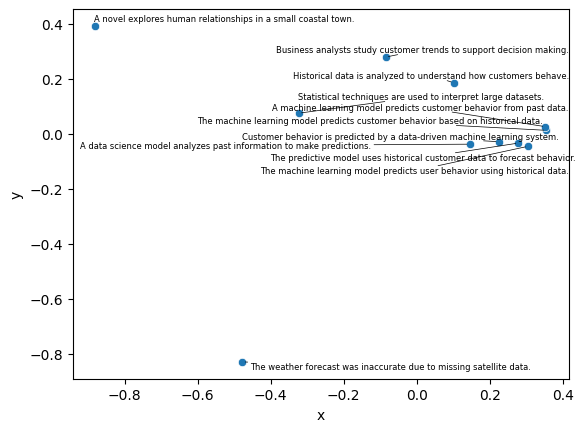

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# Sample data
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"]).assign(label = documents)

# Create the scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', data=df, ax=ax)

# Add labels
texts = []
for i, row in df.iterrows():
    texts.append(ax.text(row['x'], row['y'], row['label'], fontsize=6))

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

plt.show()